In [3]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [32]:
df = pd.read_csv('BA_reviews.csv')

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/my/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/my/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
def clean_text(text):
    text = re.sub(r'‚úÖ Trip Verified', 'Not Verified', text)

    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    
    return text

    

In [34]:
df['cleaned_text'] = df['reviews'].apply(clean_text)

In [45]:
def categorize_sentiment(sentiment):
    
    if sentiment > 0.5:
        return 'excellent'
    elif -0.5 <= sentiment <= 0.1:
        return 'good'
    elif -0.1 <= sentiment <= 0.01:
         return 'neutral'
    else:
        return 'bad'

df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

print(df[['cleaned_text', 'sentiment', 'sentiment_category']])

category_mapping = {'excellent': 'excellent', 'good': 'good', 'neutral': 'neutral', 'bad': 'bad'}
df['sentiment_category'] = df['sentiment_category'].map(category_mapping)

percentage_breakdown = df['sentiment_category'].value_counts(normalize=True) * 100

print("Sentiment Category Breakdown:")
for category, percentage in percentage_breakdown.items():
    print(f"{category.capitalize()}: {percentage:.1f}%")

                                          cleaned_text  sentiment  \
0    ✅ trip verified worst business class experienc...  -0.040385   
1    verified quite possibly worst business class e...  -0.015385   
2    verified never flying ba first last flying sin...   0.111538   
3    ✅ trip verified trip mexico city opportunity e...   0.130619   
4    ✅ trip verified upgraded check club europe sea...   0.686538   
..                                                 ...        ...   
995  ✅ trip verified tenerife heathrow effectively ...   0.066250   
996  ✅ trip verified heathrow larnaca departed time...   0.055128   
997  ✅ trip verified los angeles london enjoyable c...   0.335023   
998  ✅ trip verified london phoenix ba yesterday pl...   0.090476   
999  ✅ trip verified san francisco london paying £ ...   0.000000   

    sentiment_category  
0                 good  
1                 good  
2                  bad  
3                  bad  
4            excellent  
..                 ..

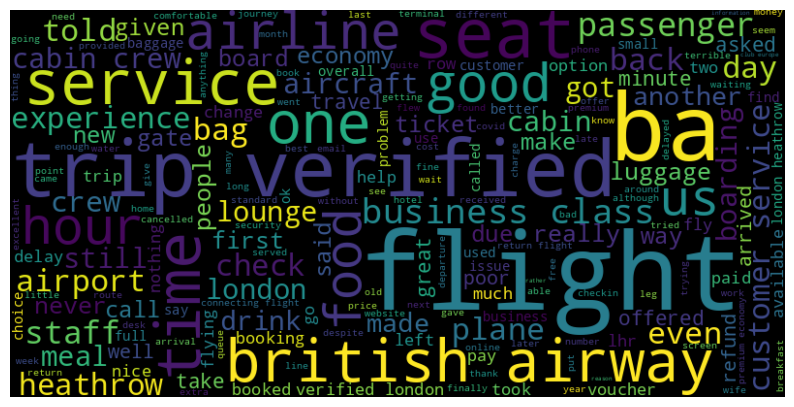

In [36]:
text_combined = ' '.join(df['cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_combined)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [38]:
for index, topic in enumerate(lda.components_):
    print(f"Top words for Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

Top words for Topic #1:
['food', 'crew', 'business', 'seats', 'time', 'good', 'ba', 'service', 'trip', 'flight']

Top words for Topic #2:
['told', 'airways', 'british', 'hours', 'service', 'customer', 'london', 'trip', 'ba', 'flight']

Top words for Topic #3:
['seat', 'class', 'trip', 'seats', 'premium', 'service', 'ba', 'flight', 'food', 'economy']

Top words for Topic #4:
['class', 'cabin', 'service', 'food', 'seat', 'good', 'trip', 'crew', 'flight', 'ba']

Top words for Topic #5:
['time', 'seat', 'seats', 'airline', 'business', 'flight', 'class', 'trip', 'airways', 'british']

